In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/train.csv'

df = pd.read_csv(file_path)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Percentage of Survivors vs. Non-Survivors**


Percentage of Survivors vs. Non-Survivors:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


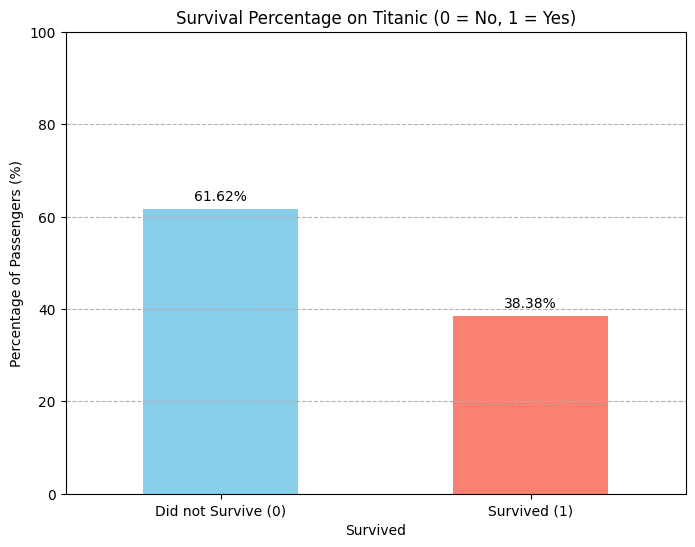

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(file_path)

print("\nPercentage of Survivors vs. Non-Survivors:")
survival_percentages = df['Survived'].value_counts(normalize=True) * 100
print(survival_percentages)

plt.figure(figsize=(8, 6))
ax = survival_percentages.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Survival Percentage on Titanic (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Percentage of Passengers (%)')
plt.xticks(ticks=[0, 1], labels=['Did not Survive (0)', 'Survived (1)'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

Survival Rate by SibSp:
 SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64


<ipython-input-8-dabb4964be1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_sibsp = sns.barplot(x=survival_rate_sibsp.index, y=survival_rate_sibsp.values, palette='summer')


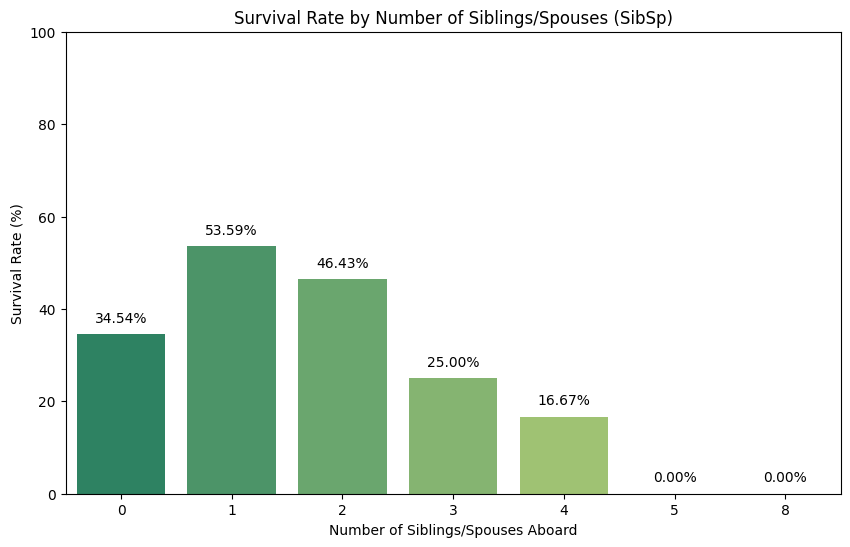

In [8]:
import seaborn as sns
survival_rate_sibsp = df.groupby('SibSp')['Survived'].mean() * 100 # Multiply by 100 for percentage
print("Survival Rate by SibSp:\n", survival_rate_sibsp)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
ax_sibsp = sns.barplot(x=survival_rate_sibsp.index, y=survival_rate_sibsp.values, palette='summer')
plt.title('Survival Rate by Number of Siblings/Spouses (SibSp)')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) # Set y-axis limit for percentages

# Add percentage text on top of bars
for i, v in enumerate(survival_rate_sibsp.values):
    ax_sibsp.text(i, v + 2, f"{v:.2f}%", color='black', ha='center', va='bottom')

plt.show()

# **Survival Rate by 'Sex'**

Survival Rate by Sex:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


<ipython-input-9-1bfc9b93faf7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=survival_rate_sex.index, y=survival_rate_sex.values, palette=['lightcoral', 'skyblue'])


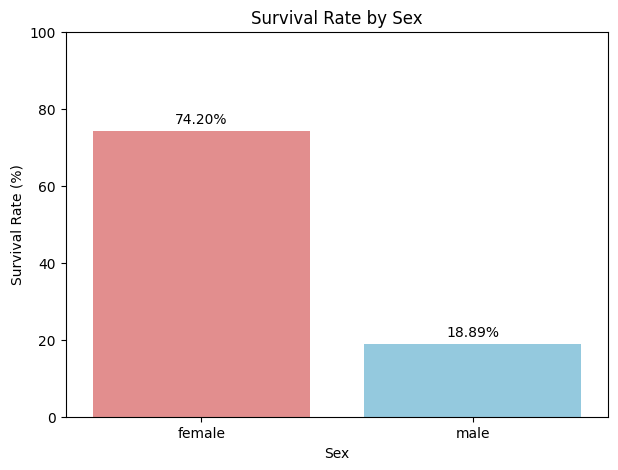

In [9]:
import seaborn as sns

survival_rate_sex = df.groupby('Sex')['Survived'].mean() * 100  # .mean() gives proportion, *100 for percentage
print("Survival Rate by Sex:\n", survival_rate_sex)

# Plotting with Seaborn
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=survival_rate_sex.index, y=survival_rate_sex.values, palette=['lightcoral', 'skyblue'])
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Sex')
plt.ylim(0, 100)

for i, v in enumerate(survival_rate_sex.values):
    ax.text(i, v + 2, f"{v:.2f}%", color='black', ha='center')

plt.show()

# **Survival Rate by 'Pclass' (Passenger Class)**


Survival Rate by Passenger Class:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


<ipython-input-10-5390c3fc3e21>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=survival_rate_pclass.index, y=survival_rate_pclass.values, palette='viridis')


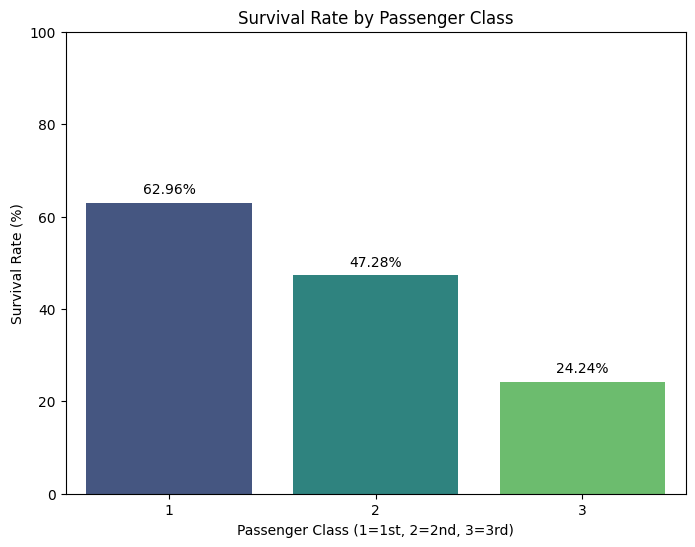

In [10]:
# Calculate survival rate by Pclass
survival_rate_pclass = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival Rate by Passenger Class:\n", survival_rate_pclass)

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=survival_rate_pclass.index, y=survival_rate_pclass.values, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class (1=1st, 2=2nd, 3=3rd)')
plt.ylim(0, 100)

# Add percentage text on top of bars
for i, v in enumerate(survival_rate_pclass.values):
    ax.text(i, v + 2, f"{v:.2f}%", color='black', ha='center')

plt.show()

# **Survival Rate by 'Embarked' (Port of Embarkation)**


Survival Rate by Port of Embarkation:
 Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


<ipython-input-11-97f75a6bc37e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=survival_rate_embarked.index, y=survival_rate_embarked.values, palette='coolwarm')


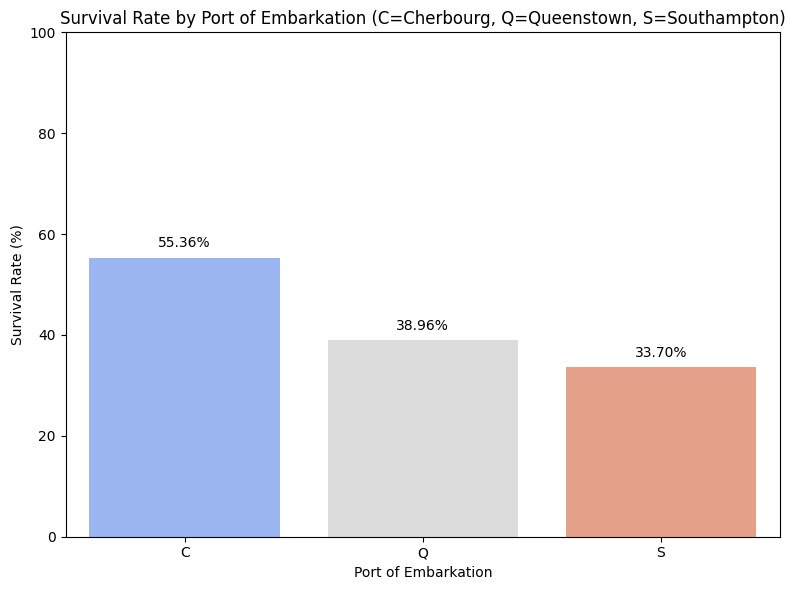

In [11]:
# Calculate survival rate by Embarked
survival_rate_embarked = df.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival Rate by Port of Embarkation:\n", survival_rate_embarked)

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=survival_rate_embarked.index, y=survival_rate_embarked.values, palette='coolwarm')
plt.title('Survival Rate by Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Port of Embarkation')
plt.ylim(0, 100)
plt.tight_layout()
# Add percentage text on top of bars
for i, v in enumerate(survival_rate_embarked.values):
    ax.text(i, v + 2, f"{v:.2f}%", color='black', ha='center')

plt.show()

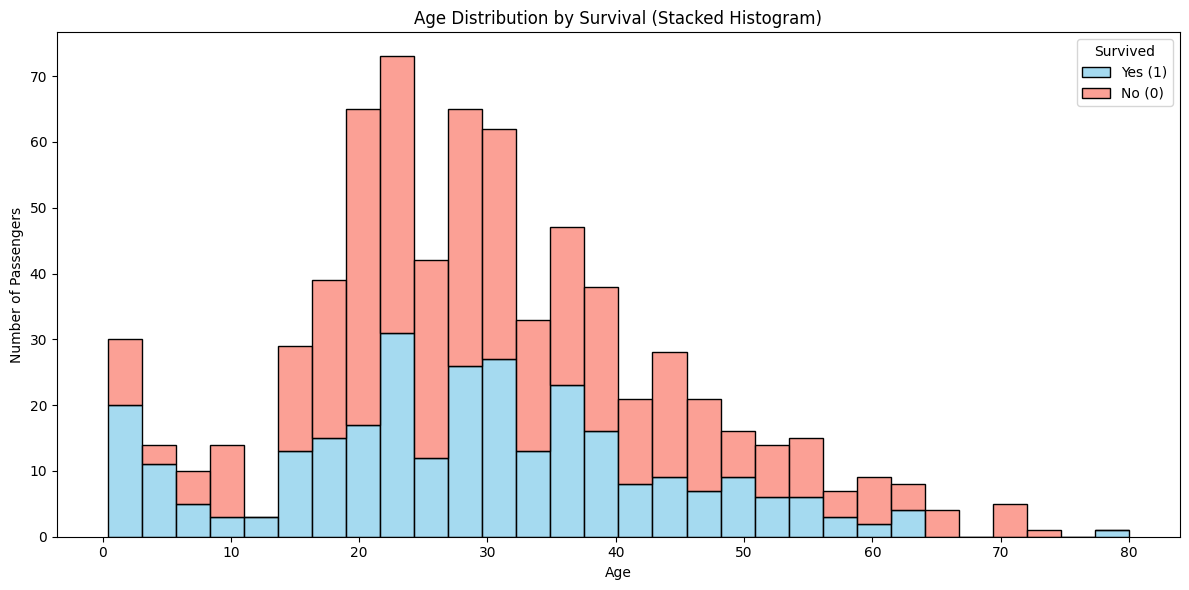

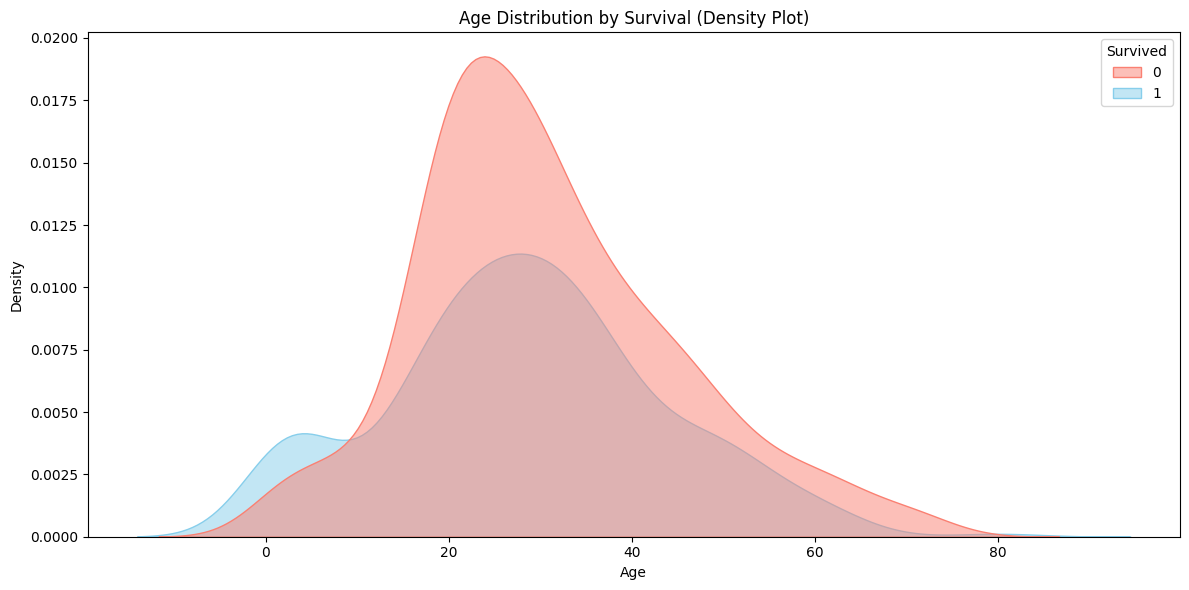

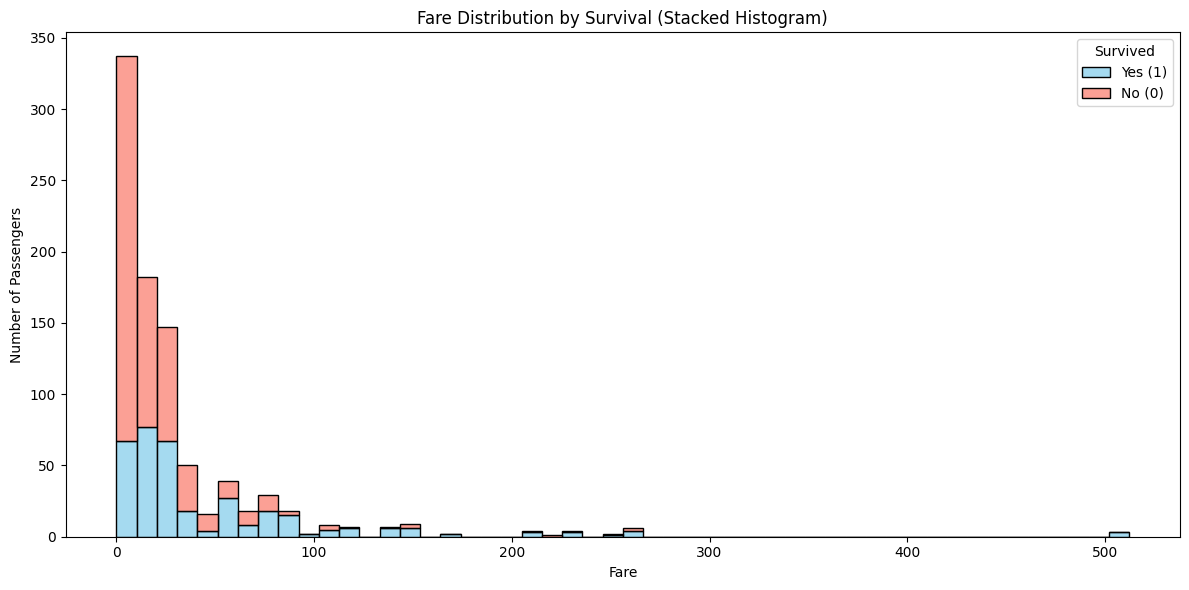

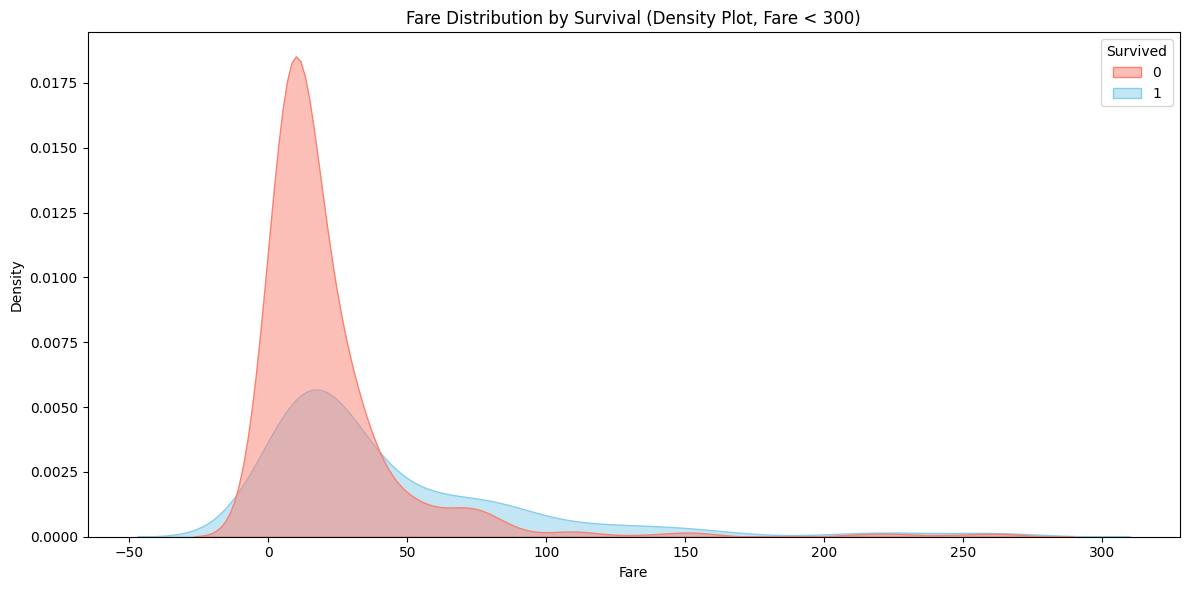

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Age Distribution by Survival ---

plt.figure(figsize=(12, 6))

# Using Seaborn's histplot
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=False, palette={0: 'salmon', 1: 'skyblue'}, bins=30)
plt.title('Age Distribution by Survival (Stacked Histogram)')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Yes (1)', 'No (0)'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
# Using Seaborn's kdeplot (Kernel Density Estimate for smooth distributions)
sns.kdeplot(data=df.dropna(subset=['Age']), x='Age', hue='Survived', fill=True, alpha=0.5, palette={0: 'salmon', 1: 'skyblue'})
plt.title('Age Distribution by Survival (Density Plot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# --- 2. Fare Distribution by Survival ---

plt.figure(figsize=(12, 6))

# Histplot for Fare (Stacked)
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', kde=False, palette={0: 'salmon', 1: 'skyblue'}, bins=50) # More bins for Fare
plt.title('Fare Distribution by Survival (Stacked Histogram)')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Yes (1)', 'No (0)'])
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))

# KDE plot for Fare
sns.kdeplot(data=df[df['Fare'] < 300], x='Fare', hue='Survived', fill=True, alpha=0.5, palette={0: 'salmon', 1: 'skyblue'}) # Filter extreme fares
plt.title('Fare Distribution by Survival (Density Plot, Fare < 300)')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# **Missing Values**

Missing Value Counts per Column:
Age         177
Cabin       687
Embarked      2
dtype: int64

Missing Value Percentages per Column:
Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


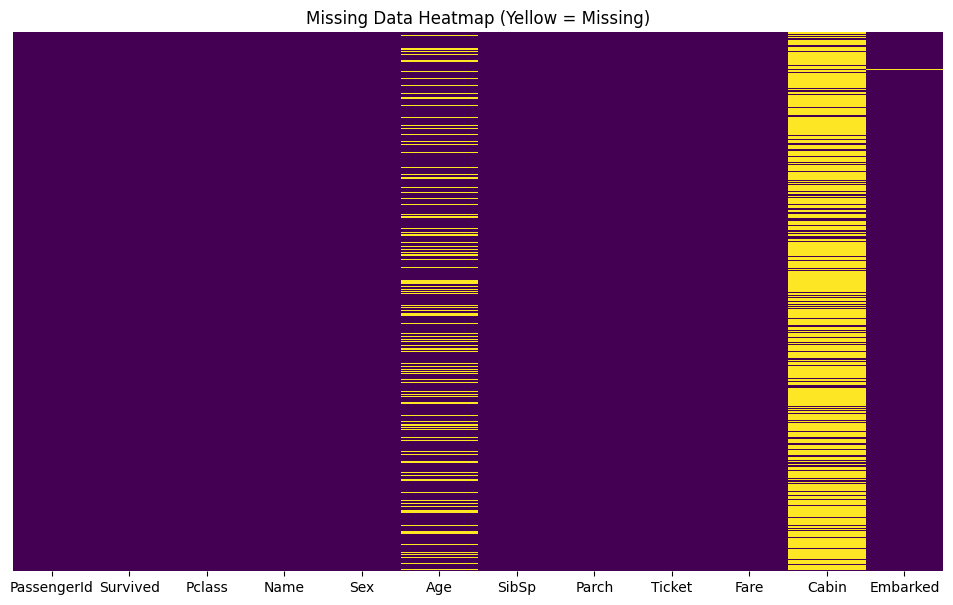

In [13]:
# --- Count missing values in each column ---
missing_counts = df.isnull().sum()
print("Missing Value Counts per Column:")
print(missing_counts[missing_counts > 0]) # Show only columns with missing values

# --- Calculate percentage of missing values in each column ---
total_rows = len(df)
missing_percentages = (df.isnull().sum() / total_rows) * 100
print("\nMissing Value Percentages per Column:")
print(missing_percentages[missing_percentages > 0].sort_values(ascending=False)) # Show and sort

# --- Heatmap using Seaborn ---
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (Yellow = Missing)')
plt.show()

<ipython-input-14-6639a216134c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_to_plot.index, y=missing_to_plot.values, palette='Reds_r')


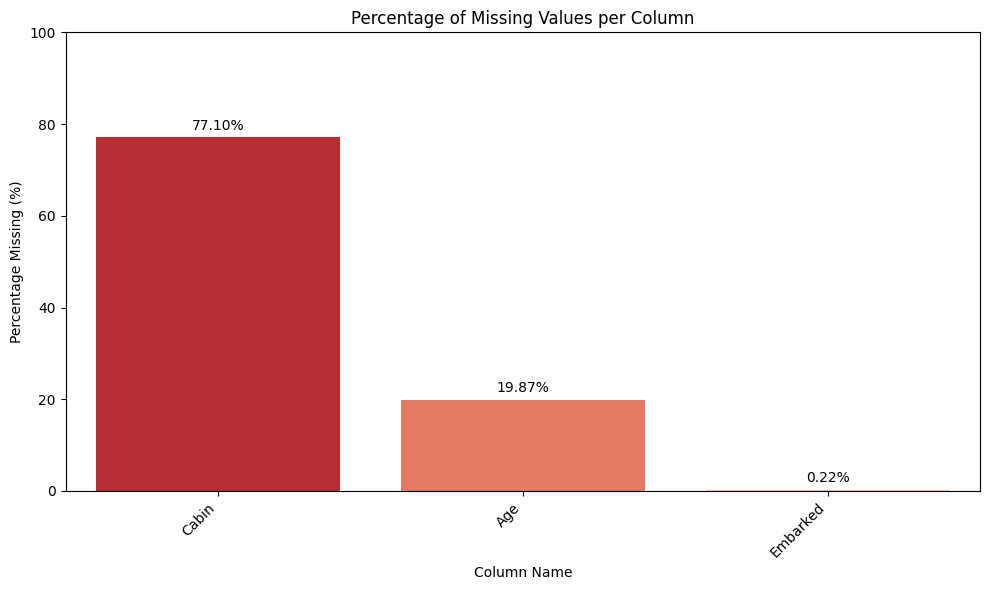

In [14]:
plt.figure(figsize=(10, 6))
missing_to_plot = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
sns.barplot(x=missing_to_plot.index, y=missing_to_plot.values, palette='Reds_r')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Percentage Missing (%)')
plt.xlabel('Column Name')
plt.ylim(0, 100)
# Adding percentage text on top of bars
for i, v in enumerate(missing_to_plot.values):
    plt.text(i, v + 1, f"{v:.2f}%", color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# ***Analyzing survival rates broken down by two categorical features like Pclass and Sex***

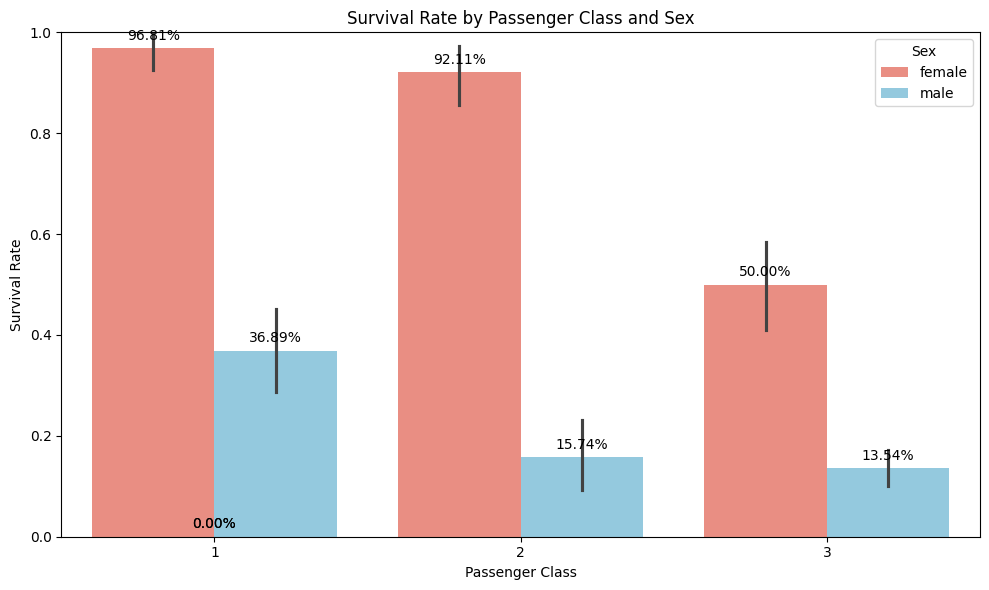

In [15]:
plt.figure(figsize=(10, 6))
ax_bp = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df,
                 palette={'male': 'skyblue', 'female': 'salmon'})
plt.title('Survival Rate by Passenger Class and Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1) # Survival rate is between 0 and 1
plt.tight_layout()

# Add percentage text for barplot
for p in ax_bp.patches:
    ax_bp.annotate(f"{p.get_height()*100:.2f}%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9), textcoords='offset points')
plt.show()

# **Correlation Catrix Using a Heatmap**

Correlation Matrix:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


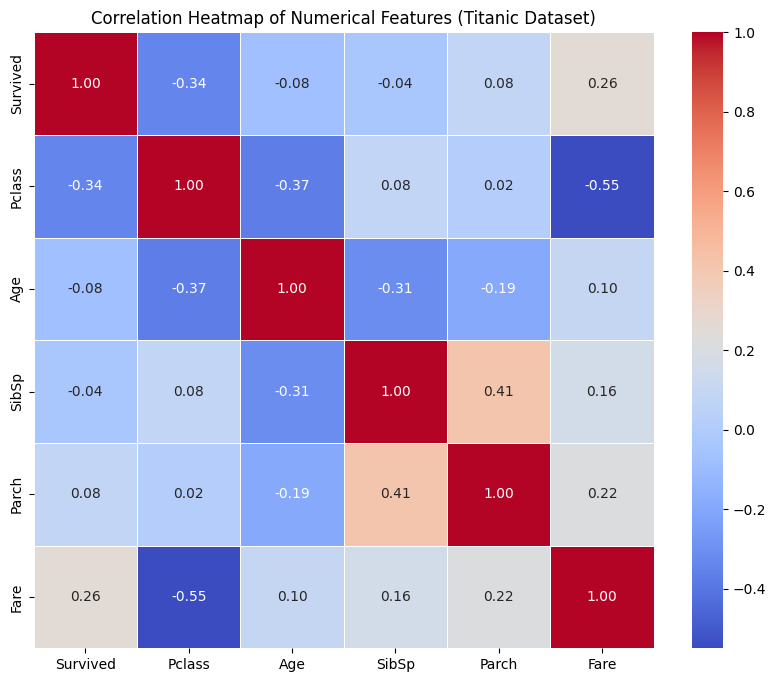

In [16]:
numerical_features_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

correlation_matrix = numerical_features_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (Titanic Dataset)')
plt.show()

# **Outlier Detection**

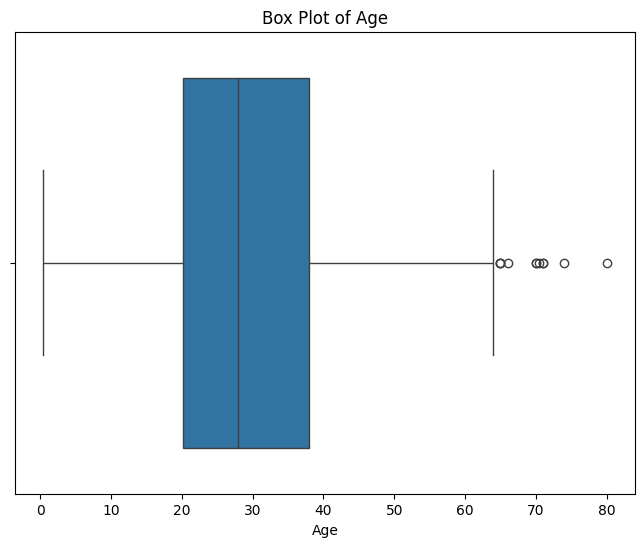

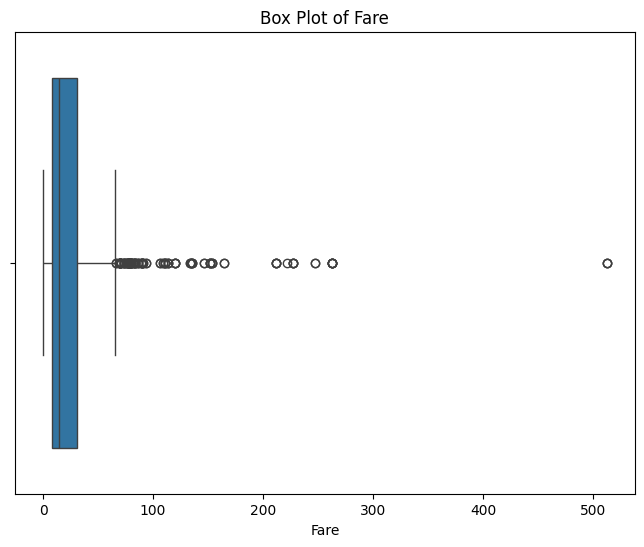

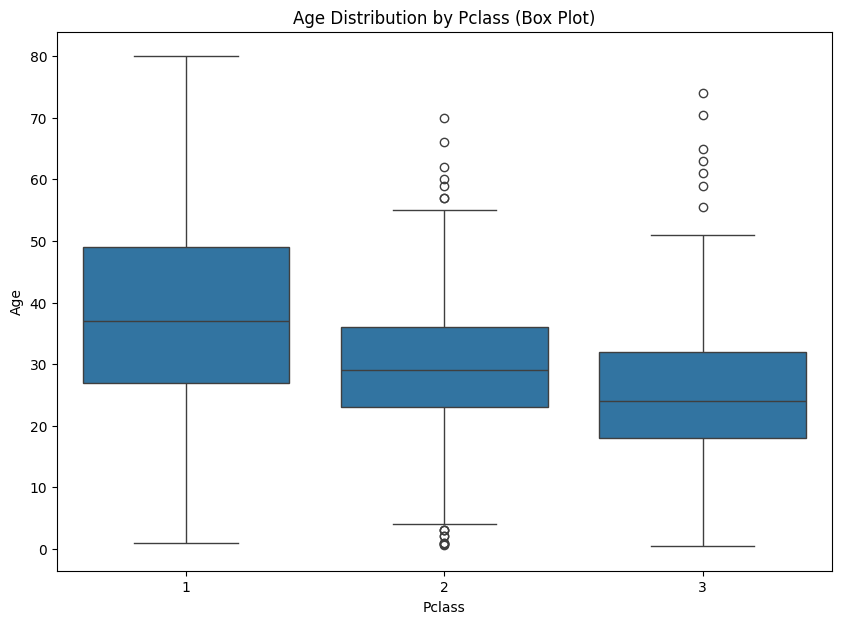

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age']) # For a single feature
plt.title('Box Plot of Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.show()

# You can also plot for different categories
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass (Box Plot)')
plt.show()

# **Hadnling Missing Values**

In [18]:
# Calculate median from the training set ONLY
median_age = df['Age'].median()
df.fillna({'Age': median_age}, inplace=True)

In [19]:
df = df.drop('Cabin', axis=1)

In [20]:
embarked_mode = df['Embarked'].mode()[0]
print(f"Mode of Embarked: {embarked_mode}")

df['Embarked'] = df['Embarked'].fillna(embarked_mode)

Mode of Embarked: S


Missing Value Counts per Column:
Series([], dtype: int64)

Missing Value Percentages per Column:
Series([], dtype: float64)


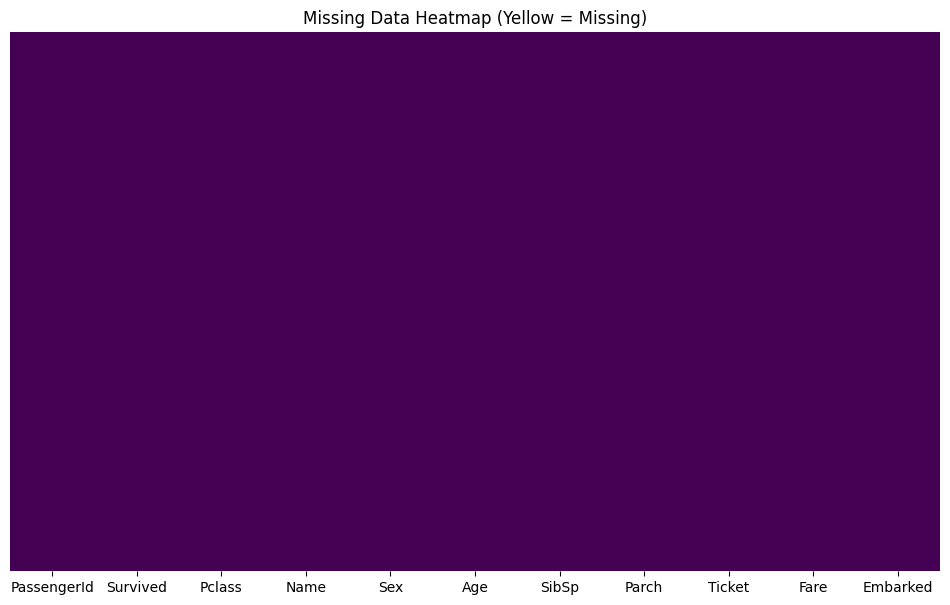

In [21]:
missing_counts = df.isnull().sum()
print("Missing Value Counts per Column:")
print(missing_counts[missing_counts > 0])

missing_percentages = (df.isnull().sum() / total_rows) * 100
print("\nMissing Value Percentages per Column:")
print(missing_percentages[missing_percentages > 0].sort_values(ascending=False)) # Show and sort

plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (Yellow = Missing)')
plt.show()

# **Feature Enginneering**

In [22]:
# For 'Sex'
sex_mapping = {'male': 0, 'female': 1}
df['Sex_encoded'] = df['Sex'].map(sex_mapping)

# For 'Embarked'
embarked_categories = df['Embarked'].unique() # Get unique categories in order
embarked_mapping = {category: i for i, category in enumerate(embarked_categories)}
df['Embarked_encoded'] = df['Embarked'].map(embarked_mapping)

In [23]:
df = df.drop(['Name', 'Ticket', 'PassengerId','Embarked','Sex'], axis=1)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,0,3,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,0


In [25]:
X = df.drop(columns=["Survived"], axis=1)
y = df["Survived"]

**Setting up the Parameters for the Model**

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score


def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

In [55]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7668161434977578
CV SCORE : 0.7766995166656205


In [56]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 247, number of negative: 421
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369760 -> initscore=-0.533244
[LightGBM] [Info] Start training from score -0.533244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [57]:
from xgboost import XGBClassifier

model = XGBClassifier()
classify(model)

Accuracy 0.8116591928251121
CV SCORE : 0.823821480133074


In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

Accuracy 0.8116591928251121
CV SCORE : 0.8069926558282594


In [59]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model)

Accuracy 0.8026905829596412
CV SCORE : 0.7935220639005711


In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 0.8071748878923767
CV SCORE : 0.7934906785512524


In [61]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
file_path = '/content/drive/MyDrive/test.csv'
df_test = pd.read_csv(file_path)

In [64]:
X_test = df_test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [65]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [66]:
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


**Data Preprocessing**

In [68]:
X_test = df_test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [71]:
X_test = X_test.rename(columns={'Sex': 'Sex_encoded', 'Embarked': 'Embarked_encoded'})
X_test

,Pclass,Sex_encoded,Age,SibSp,Parch,Fare,Embarked_encoded
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


**Model Testing**

In [73]:
train_cols = X.columns
X_test = X_test[train_cols]

pred = model.predict(X_test)
pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,